# Homework Assignment 2

## Section 1: Admissions Dataset

In [2]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [6]:
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;


In [38]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

Answer:
Target = admit
Featrures = gre, gpa, prestige
continuous feature = gre,gpa
categorical feature = prestige


In [39]:
admissions.admit.value_counts(normalize = True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [40]:
admissions.prestige.unique()
                                                                                        

array([ 3.,  1.,  4.,  2., nan])

In [41]:
prestige_d = pd.get_dummies(admissions.prestige,prefix = 'prestige',drop_first = True)

In [42]:
prestige_d.head()

,prestige_2.0,prestige_3.0,prestige_4.0
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1


In [43]:
del admissions_tr
admissions_tr = pd.concat([admissions,prestige_d],axis = 1)
admissions_tr.head()

,admit,gre,gpa,prestige,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,1,0
1,1,660.0,3.67,3.0,0,1,0
2,1,800.0,4.00,1.0,0,0,0
3,1,640.0,3.19,4.0,0,0,1
4,0,520.0,2.93,4.0,0,0,1


In [44]:
admissions_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
admit           400 non-null int64
gre             398 non-null float64
gpa             398 non-null float64
prestige        399 non-null float64
prestige_2.0    400 non-null uint8
prestige_3.0    400 non-null uint8
prestige_4.0    400 non-null uint8
dtypes: float64(3), int64(1), uint8(3)
memory usage: 13.8 KB


In [45]:
admissions_tr.dropna(inplace = True)

In [46]:
admissions_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 7 columns):
admit           397 non-null int64
gre             397 non-null float64
gpa             397 non-null float64
prestige        397 non-null float64
prestige_2.0    397 non-null uint8
prestige_3.0    397 non-null uint8
prestige_4.0    397 non-null uint8
dtypes: float64(3), int64(1), uint8(3)
memory usage: 16.7 KB


In [57]:
admissions_tr.admit.unique()

array([0, 1])

**Question 2:**

What do you think is the goal of using machine learning with this dataset.

Answer: To predict the admission status of the candidate.

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

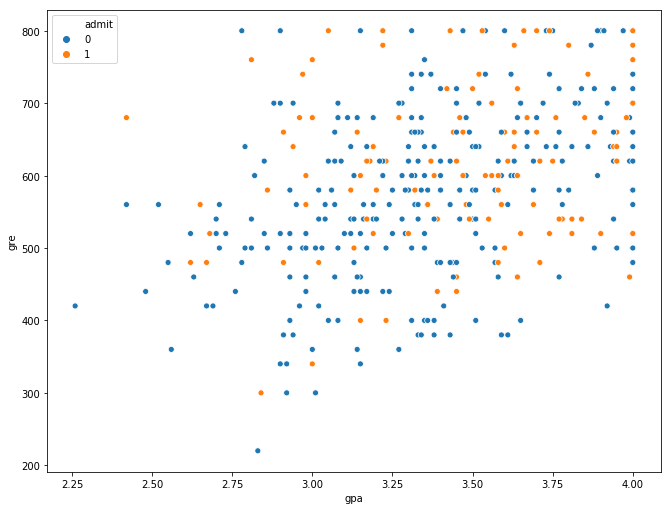

In [59]:
plt.figure(figsize = (11,8.5))
sns.scatterplot(x = admissions_tr.gpa, y = admissions_tr.gre, hue = admissions_tr.admit);

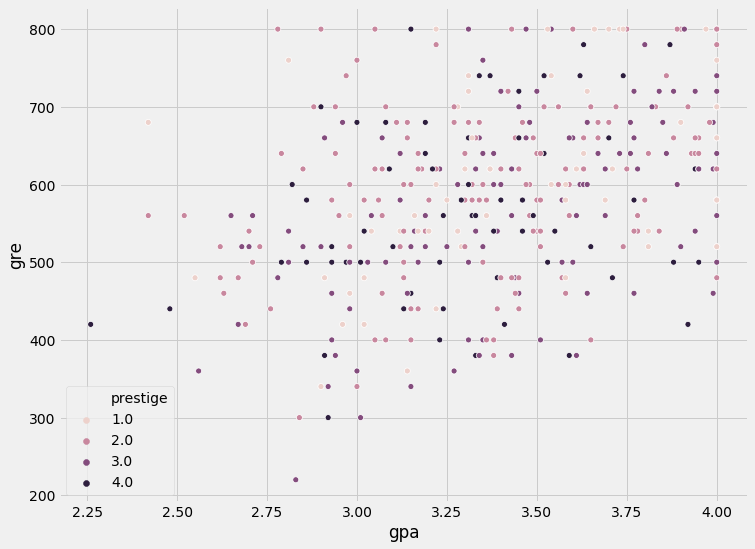

In [153]:
plt.figure(figsize = (11,8.5))
sns.scatterplot(x = admissions_tr.gpa, y = admissions_tr.gre, hue = admissions_tr.prestige);

majority of Students were admitted when the gre and gpa scores are high. 

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
X = admissions_tr.drop(['admit','prestige'],axis = 1)
y = admissions_tr.admit

In [129]:
X.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,380.0,3.61,0,1,0
1,660.0,3.67,0,1,0
2,800.0,4.00,0,0,0
3,640.0,3.19,0,0,1
4,520.0,2.93,0,0,1


In [148]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 74.00 percent of the testing data


In [149]:
preds = lr.predict(X)
accuracy_score(y, preds)

0.7103274559193955

In [132]:
#accuracy
lg_acc_score_train = cross_val_score(LogisticRegression(), X_train, y_train, cv = 5, scoring="accuracy").mean()

In [133]:
#accuracy
lg_acc_score_test = cross_val_score(LogisticRegression(), X_test, y_test, cv = 5, scoring="accuracy").mean()

In [134]:
lg_acc_score_train - lg_acc_score_test

-0.015607238435070725

Question 5: Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

In [137]:
depths_range = list(range(2,20))
param_grid_dt = {'min_samples_split' : list(range(2, 30 ,2)), "max_depth": depths_range}
#Intialize Grid
grid_ac = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "precision")

#Fit grid on data
grid_ac.fit(X,y)

pred_rf = grid_ac.predict(X)
y_prob = grid_ac.predict_proba(X)
y_score = y_prob[ : , 1]
print(roc_auc_score(y, y_score))
print(grid_ac.best_params_)
print(grid_ac.best_score_)

0.825733614479002
{'max_depth': 9, 'min_samples_split': 28}
0.6679869948131912


In [138]:
parameters = {'n_neighbors':[2,3,4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parameters)
clf.fit(X,y)

#predictions on test data
prediction=clf.predict(X)


y_prob = clf.predict_proba(X)
y_score = y_prob[ : , 1]

print(roc_auc_score(y, y_score))
print(clf.best_params_)
print(clf.best_score_)

0.8341240555262696
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 4}
0.6700251889168766


In [119]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [124]:
fn(y,prediction)

85

In [139]:
confusion_matrix(y,prediction)

array([[257,  14],
       [ 84,  42]])

In [140]:
pd.crosstab(y,prediction)

col_0,0,1
admit,,
0,257,14
1,84,42


In [141]:
confusion_matrix(y,pred_rf)

array([[256,  15],
       [ 77,  49]])

In [80]:
grid_ac.best_params_

{'max_depth': 3, 'min_samples_split': 28}

In [154]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=9)
#Fit the model on the "fake data"
knn5.fit(X,y)
#Find the accuracy score of the model on the data
score5 = float(knn5.score(X,y))
print ("The model accurately labelled {:.2f} percent of the data".format(score5*100))

The model accurately labelled 73.55 percent of the data


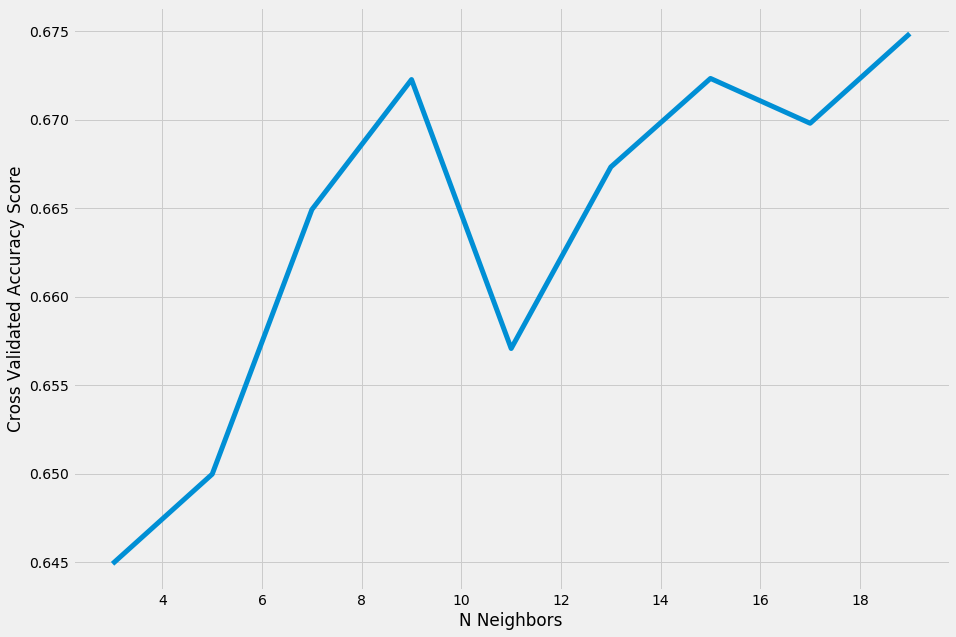

In [144]:
#Initialize neighbors list
neighbors = range(3, 20, 2)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X, y, cv =5 , scoring="accuracy").mean()
    #Append cv_score to cv_scores
    cv_scores.append(cv_score)
    
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 10))
plt.plot(neighbors, cv_scores, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")
plt.show()

In [107]:
prob_lg = lr.predict_proba(X_test)
prob_lg[:, 1]

array([0.34441814, 0.37033467, 0.44733191, 0.29229823, 0.06685843,
       0.33083005, 0.18097822, 0.0949094 , 0.19265642, 0.38391163,
       0.28119251, 0.33783515, 0.14861883, 0.47537709, 0.32273162,
       0.59050538, 0.37221687, 0.60972424, 0.59472713, 0.22000288,
       0.25053006, 0.50228385, 0.42440446, 0.21073683, 0.31184102,
       0.21419912, 0.29743876, 0.27719355, 0.60459171, 0.16182864,
       0.15643442, 0.66983358, 0.34338794, 0.27670825, 0.44637579,
       0.32804142, 0.44036567, 0.5324025 , 0.18941352, 0.19433154,
       0.13228147, 0.09630377, 0.12256806, 0.37340938, 0.45831971,
       0.5163157 , 0.07337162, 0.1492653 , 0.2245117 , 0.406453  ,
       0.424796  , 0.3963811 , 0.10223952, 0.23715219, 0.18884006,
       0.1918191 , 0.30576702, 0.24358204, 0.12309148, 0.26471284,
       0.54042281, 0.17975044, 0.20669366, 0.36820783, 0.40056055,
       0.34466067, 0.252707  , 0.37599287, 0.39824191, 0.27660135,
       0.31508274, 0.28402879, 0.33417331, 0.12596147, 0.19408

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

I would rather have a model that minimizes false negatives to ensure no good candidates are missed. 

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [147]:
X.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,380.0,3.61,0,1,0
1,660.0,3.67,0,1,0
2,800.0,4.00,0,0,0
3,640.0,3.19,0,0,1
4,520.0,2.93,0,0,1


In [166]:
X_prod = pd.DataFrame({'gre':[560,750,660],'gpa':[3.6,3.8,3.1],'prestige_2.0':[1,0,0],'prestige_3.0':[0,0,0],'prestige_4.0':[0,1,0]})
X_prod

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,560,3.6,1,0,0
1,750,3.8,0,0,1
2,660,3.1,0,0,0


In [167]:
lr.fit(X,y)
prod_lg_prob = lr.predict_proba(X_prod)
prod_lg_prob[:, 1]
#prod_lg_prob

array([0.357864  , 0.27430945, 0.52028323])

In [168]:
knn5.predict(X_prod)

array([0, 0, 0])

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [169]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [172]:
data.target.value_counts(normalize = True)

0    0.63825
1    0.36175
Name: target, dtype: float64

In [173]:
X = data.drop('target',axis = 1)
y = data.target

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)

In [177]:
#Without Hyper Parameters Tuning
#1-1,DesicionTree
#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.824
Confusion Metrix:
 [[554  94]
 [ 82 270]]


In [178]:
#Without Hyper Parameters Tuning
#1-2,Randomforest
#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.86
Confusion Metrix:
 [[594  98]
 [ 42 266]]


In [179]:
#Without Hyper Parameters Tuning
#1-3,SVM
#importing module
from sklearn import svm
#making the instance
model = svm.SVC(random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.912
Confusion Metrix:
 [[599  51]
 [ 37 313]]


In [180]:
#Without Hyper Parameters Tuning
#1-4,kNearestNeighbors
#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.88
Confusion Metrix:
 [[596  80]
 [ 40 284]]


In [181]:
#With Hyper Parameters Tuning
#2-1,DesicionTree
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 13, 'random_state': 123}
Accuracy: 0.781
Confusion Metrix:
 [[549 132]
 [ 87 232]]


In [182]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.875
Confusion Metrix:
 [[587  76]
 [ 49 288]]


In [183]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf'}
Accuracy: 0.905
Confusion Metrix:
 [[596  55]
 [ 40 309]]


In [184]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.885
Confusion Metrix:
 [[596  75]
 [ 40 289]]


In [ ]:
# data.Target.value counts = 0    0.63825
#                            1    0.36175

#Result           Without HyperParameterTuning      With HyperParameterTuning
#DecisionTree     0.824                    0.781   →not improved
#Randomforest     0.86                    0.875   →the same result
#SVM              0.912                   0.905    →not improved
#kNearestNeighbor 0.88                     0.885    →the same result 

#The default hyper parameters set of DecisionTree, Randomforest and kNearestNeighbor looks not so bad.

In [186]:
data.corr()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
haight,1.000000,-0.691099,-0.003451,0.017411,0.023025,-0.055019,-0.106320,-0.034309,-0.299097,0.006428,0.164962,0.028713,0.324309,-0.423019,-0.171926
mission,-0.691099,1.000000,0.013116,-0.006411,0.448394,0.023159,0.229411,0.248336,0.672682,-0.004066,-0.223609,-0.013775,-0.132077,0.508043,0.136988
soma,-0.003451,0.013116,1.000000,-0.017127,-0.008683,0.023943,0.033782,0.008518,0.011988,-0.003719,-0.015025,-0.003473,-0.021821,0.030777,0.010718
sunset,0.017411,-0.006411,-0.017127,1.000000,0.028527,-0.017834,0.011205,0.017100,-0.018217,0.000801,-0.007153,0.004034,-0.024942,-0.000102,-0.026396
richmond,0.023025,0.448394,-0.008683,0.028527,1.000000,0.011149,-0.038702,0.076728,0.091362,-0.007679,-0.202575,-0.023585,-0.067719,0.170600,-0.196710
glen_park,-0.055019,0.023159,0.023943,-0.017834,0.011149,1.000000,0.119650,-0.043640,-0.034043,0.010605,-0.019650,0.006034,-0.432634,0.374960,0.005610
castro,-0.106320,0.229411,0.033782,0.011205,-0.038702,0.119650,1.000000,-0.019393,0.118713,0.016342,0.063033,0.006320,-0.278914,0.441421,0.187220
potrero,-0.034309,0.248336,0.008518,0.017100,0.076728,-0.043640,-0.019393,1.000000,-0.044419,-0.035553,0.093639,0.033770,0.060056,-0.368261,-0.199197
hayes_valley,-0.299097,0.672682,0.011988,-0.018217,0.091362,-0.034043,0.118713,-0.044419,1.000000,0.015605,0.105327,0.001810,-0.011746,0.453605,0.176853
fillmore,0.006428,-0.004066,-0.003719,0.000801,-0.007679,0.010605,0.016342,-0.035553,0.015605,1.000000,-0.003304,-0.019405,-0.006632,0.026074,0.028804


In [187]:

#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X,y)
#Prediction
prediction=model.predict(X)

In [188]:
model.feature_importances_

array([0.07098178, 0.06699225, 0.02891994, 0.03055856, 0.12785922,
       0.10611607, 0.06824089, 0.08197662, 0.06528219, 0.02948735,
       0.06054573, 0.02842741, 0.12873618, 0.1058758 ])

In [189]:
data.columns

Index(['haight', 'mission', 'soma', 'sunset', 'richmond', 'glen_park',
       'castro', 'potrero', 'hayes_valley', 'fillmore', 'bernal', 'marina',
       'north_beach', 'excelsior', 'target'],
      dtype='object')

In [199]:
data_imp = pd.DataFrame({'col': data.columns[0:14],'imp':model.feature_importances_})
data_imp[data_imp.imp > 0.1]
# Important features based on the feature importance

,col,imp
4,richmond,0.127859
5,glen_park,0.106116
12,north_beach,0.128736
13,excelsior,0.105876


In [194]:
X_imp = data.drop(['haight', 'mission', 'soma', 'sunset', 'castro','potrero','hayes_valley', 'fillmore','bernal', 'marina'],axis = 1)
y = data.target

In [195]:
X_imp.head()

,richmond,glen_park,north_beach,excelsior,target
0,4.557675,1.110156,1.498388,2.157730,1
1,-1.262072,0.120989,0.512079,4.340694,1
2,0.906893,-2.799484,1.502255,-1.539356,1
3,1.549620,-2.335671,2.268457,-0.004678,0
4,4.794145,-1.093006,0.588193,0.533464,1


# Using only the selected features for Model

In [202]:
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#Train the model with only the selected features
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.25,random_state=5)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 1.0
Confusion Metrix:
 [[636   0]
 [  0 364]]


## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in early 2019 and use the model to predict how much revenue those movies will bring in.

In [7]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [87]:
movies.language.unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [9]:
movies.gross.mean()

48468407.52680933

In [8]:
movies_nn = movies.dropna()
movies_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [9]:
movies_nn.color.unique()

array(['Color', ' Black and White'], dtype=object)

In [10]:
movies_nn = movies_nn[movies_nn.language == 'English']

In [80]:
movies_nn.shape

(3598, 28)

In [24]:
movies_nn.genres.unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thriller', 'Animation|

In [11]:
movies_nn.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.243351,0.175744,0.255203,0.167040,0.470754,0.594416,0.238858,-0.034079,0.564863,0.464057,0.433398,0.255578,0.356190,0.186175,0.707976
duration,0.243351,1.000000,0.188102,0.134334,0.090986,0.265636,0.352955,0.130321,0.023581,0.369479,0.302649,-0.128033,0.138478,0.376053,0.162368,0.222757
director_facebook_likes,0.175744,0.188102,1.000000,0.116661,0.088153,0.137379,0.300907,0.117186,-0.047857,0.219082,0.094366,-0.046466,0.115285,0.203228,0.038054,0.163061
actor_3_facebook_likes,0.255203,0.134334,0.116661,1.000000,0.247826,0.293838,0.267293,0.486293,0.104151,0.204899,0.262110,0.121101,0.551016,0.080785,0.046328,0.271869
actor_1_facebook_likes,0.167040,0.090986,0.088153,0.247826,1.000000,0.134262,0.176614,0.944441,0.054274,0.119386,0.156606,0.101264,0.387076,0.111227,0.056684,0.128960
gross,0.470754,0.265636,0.137379,0.293838,0.134262,1.000000,0.629051,0.224839,-0.038088,0.548406,0.643023,0.058237,0.244929,0.247039,0.064321,0.368924
num_voted_users,0.594416,0.352955,0.300907,0.267293,0.176614,0.629051,1.000000,0.246740,-0.034611,0.780670,0.394398,0.032761,0.243787,0.499245,0.088091,0.516388
cast_total_facebook_likes,0.238858,0.130321,0.117186,0.486293,0.944441,0.224839,0.246740,1.000000,0.077174,0.176517,0.234525,0.133075,0.640341,0.128997,0.068904,0.204865
facenumber_in_poster,-0.034079,0.023581,-0.047857,0.104151,0.054274,-0.038088,-0.034611,0.077174,1.000000,-0.085039,-0.028855,0.076427,0.070414,-0.060774,0.016863,0.015085
num_user_for_reviews,0.564863,0.369479,0.219082,0.204899,0.119386,0.548406,0.780670,0.176517,-0.085039,1.000000,0.415085,0.027945,0.186018,0.340215,0.100494,0.371522


In [26]:
movies_nn.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3598.0,167.96,124.50,2.00,77.00,138.50,224.00,813.0
duration,3598.0,110.02,22.20,37.00,96.00,106.00,120.00,330.0
director_facebook_likes,3598.0,822.85,3111.79,0.00,11.00,64.00,237.25,23000.0
actor_3_facebook_likes,3598.0,800.04,1929.94,0.00,218.00,452.00,701.75,23000.0
actor_1_facebook_likes,3598.0,8029.10,15780.51,0.00,785.25,1000.00,13000.00,640000.0
gross,3598.0,54628082.78,71100567.86,162.00,10298422.75,31886934.50,69988754.75,760505847.0
num_voted_users,3598.0,107521.36,153724.79,91.00,20014.25,54716.50,131224.50,1689764.0
cast_total_facebook_likes,3598.0,11950.28,19411.43,0.00,2056.00,4313.00,16743.75,656730.0
facenumber_in_poster,3598.0,1.39,2.06,0.00,0.00,1.00,2.00,43.0
num_user_for_reviews,3598.0,341.29,414.05,4.00,112.00,212.00,405.00,5060.0


In [12]:
movies_nn = movies_nn.select_dtypes(include=['int64','float64']) #only float and int values
print (movies_nn.shape)

(3598, 16)


In [28]:
movies_nn.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [13]:
X = movies_nn.drop(['gross'],axis = 1)
y = movies_nn.gross
X.shape

(3598, 15)

In [84]:
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [232]:
y.head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
5     73058679.0
Name: gross, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)

In [31]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [44]:
#making the instance
model=svm.SVR()
#Hyper Parameters Set
params = {'C': [1], 
          'kernel': ['rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [45]:
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


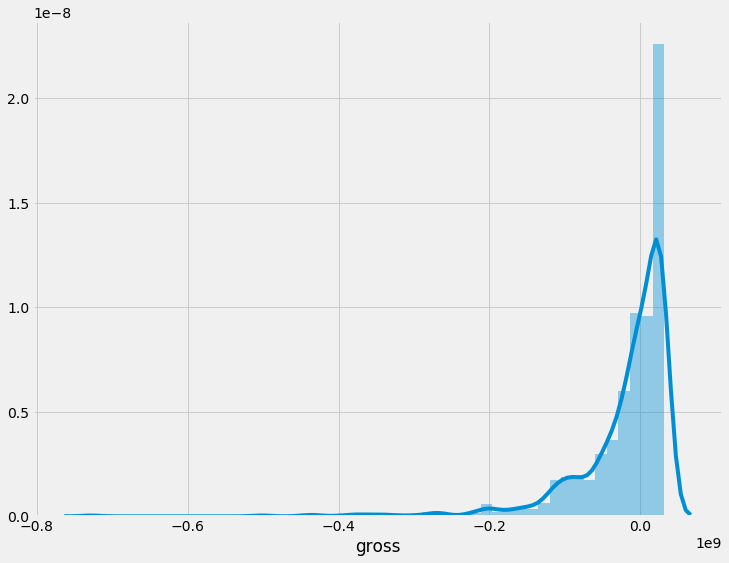

In [46]:
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
# print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
# print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
diff = prediction - y_test

plt.figure(figsize = (11,8.5))
sns.distplot(diff)

In [47]:
print(y_test.head())
print(prediction[0:5])
print(diff[0:5])

1767    44450000.0
4571      798341.0
3418      108662.0
401     20315324.0
1264    42071069.0
Name: gross, dtype: float64
[31837373.5 31837373.5 31837373.5 31837373.5 31837373.5]
1767   -12612626.5
4571    31039032.5
3418    31728711.5
401     11522049.5
1264   -10233695.5
Name: gross, dtype: float64


In [98]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
#Step 2
logr = LogisticRegression()
logr.fit(X_train, y_train)

#Step 3
preds = logr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The model accurately classified 0.89 percent of the testing data


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
preds

array([3.34185206e+08, 8.00000000e+05, 3.00523113e+08, 3.34185206e+08,
       3.34185206e+08, 4.48860890e+07, 1.00289690e+08, 3.34185206e+08,
       3.33130696e+08, 1.00289690e+08, 2.88371150e+07, 4.77700700e+06,
       1.02515793e+08, 3.33130696e+08, 3.00523113e+08, 1.93944100e+06,
       3.40748950e+07, 2.85016510e+07, 1.28311210e+07, 3.00523113e+08,
       4.48860890e+07, 1.87670866e+08, 2.88371150e+07, 3.34185206e+08,
       6.10949030e+07, 1.86336103e+08, 1.00289690e+08, 3.34185206e+08,
       2.92298923e+08, 2.06456431e+08, 3.34185206e+08, 8.00343020e+07,
       3.34185206e+08, 1.00289690e+08, 5.82207760e+07, 3.12057433e+08,
       4.48860890e+07, 3.29405070e+07, 3.00523113e+08, 2.00000000e+06,
       8.13502420e+07, 1.58115031e+08, 3.12057433e+08, 7.76796380e+07,
       7.09605170e+07, 4.48860890e+07, 2.88371150e+07, 2.88371150e+07,
       2.44052771e+08, 3.34185206e+08, 9.04540430e+07, 5.69440100e+06,
       1.80483000e+05, 2.30000000e+04, 4.58574530e+07, 1.31564731e+08,
      

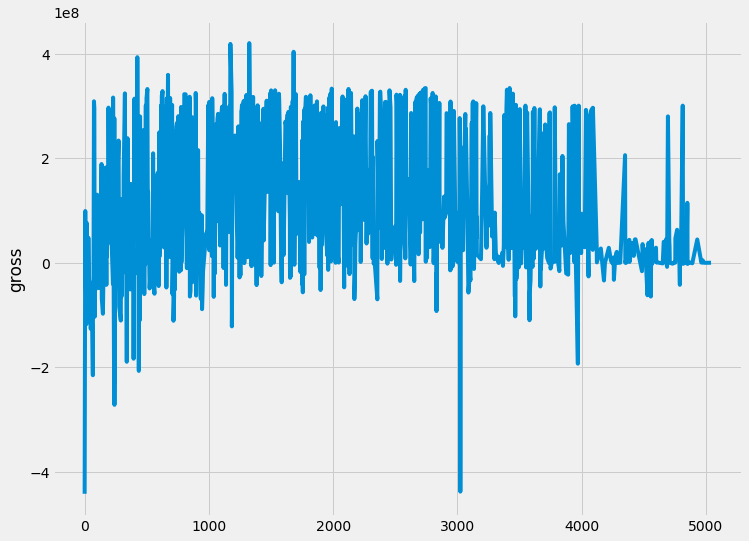

In [33]:
plt.figure(figsize = (11,8.5))
sns.lineplot(x = y_test.index, y = preds - y_test)

In [40]:
diff = preds - y_test

In [70]:
diff.mean()

111103578.23444444

In [96]:
cross_val_score(LogisticRegression(), X_train, y_train, cv = 'warn', scoring="accuracy").mean()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib

0.3022486772486772

In [94]:
#Without Hyper Parameters Tuning
#1-4,kNearestNeighbors
#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
# print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))


Accuracy: 0.008888888888888889


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


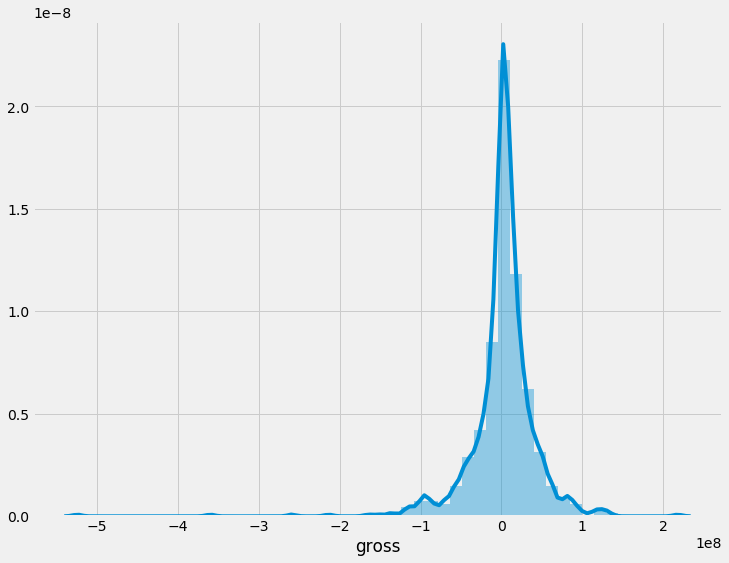

In [22]:
#Without Hyper Parameters Tuning
#1-2,Randomforest
#importing module
from sklearn.ensemble import RandomForestRegressor
#making the instance
model=RandomForestRegressor(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
# print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
# print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
diff = prediction - y_test

plt.figure(figsize = (11,8.5))
sns.distplot(diff)

The model r2 error is 0.609927


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


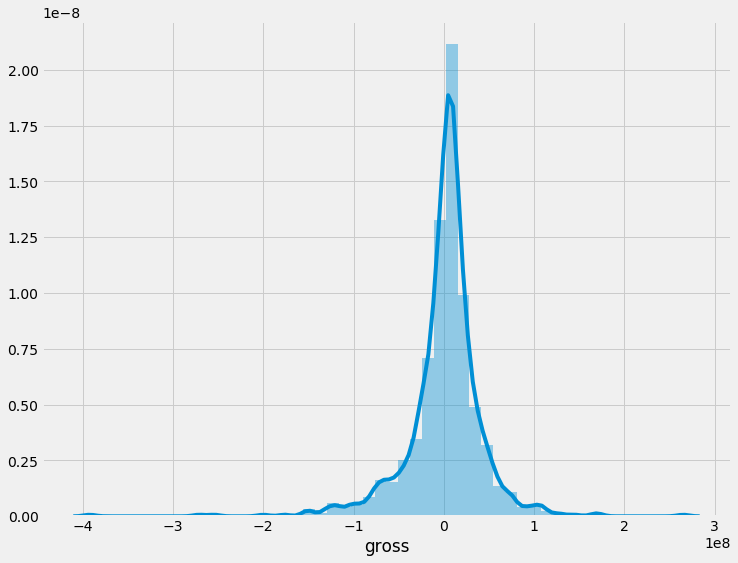

In [24]:
from sklearn.linear_model import LinearRegression
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
#Step 2
lr = LinearRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = metrics.r2_score(y_test,preds)

print ("The model r2 error is {:.6f}".format(testing_score))

diff = preds - y_test
plt.figure(figsize = (11,8.5))
sns.distplot(diff)

In [30]:
print(y_test.head())
print(preds[0:5])
print(diff[0:5])

1767    44450000.0
4571      798341.0
3418      108662.0
401     20315324.0
1264    42071069.0
Name: gross, dtype: float64
[34551432.0324018  -4231331.90982389 15088259.64674735 62832012.16174817
 29239131.25055647]
1767   -9.898568e+06
4571   -5.029673e+06
3418    1.497960e+07
401     4.251669e+07
1264   -1.283194e+07
Name: gross, dtype: float64


In [105]:
preds - y_test

1767   -9.898568e+06
4571   -5.029673e+06
3418    1.497960e+07
401     4.251669e+07
1264   -1.283194e+07
4706    5.026959e+07
3301    1.380192e+07
995     4.338648e+06
1976    3.758395e+07
1824   -1.409520e+07
3411    1.015750e+06
1361    1.848507e+07
48     -1.690765e+07
1381   -5.830197e+07
3608    6.036399e+06
4546    8.265253e+06
3445    8.667327e+06
1185    1.598510e+07
867    -9.458446e+06
3378   -2.077309e+06
4384    7.352964e+06
339    -8.371182e+07
4122    9.344104e+05
1758   -4.379571e+07
2507   -9.600087e+06
1259    7.593646e+06
1683    1.450032e+07
738    -1.963561e+07
174    -1.189370e+08
1042   -9.795687e+06
            ...     
950    -1.146946e+07
1750   -6.179840e+07
2692    3.807692e+06
1343   -1.082433e+07
1823    1.778960e+07
3793    2.425162e+05
1146    2.064780e+07
3775    8.568804e+06
1140    2.350803e+07
34      5.576902e+05
1997    2.492137e+07
550     2.246963e+07
2858    3.609902e+07
2168   -2.760670e+07
2813    7.780589e+07
3119   -4.117213e+06
917     5.381

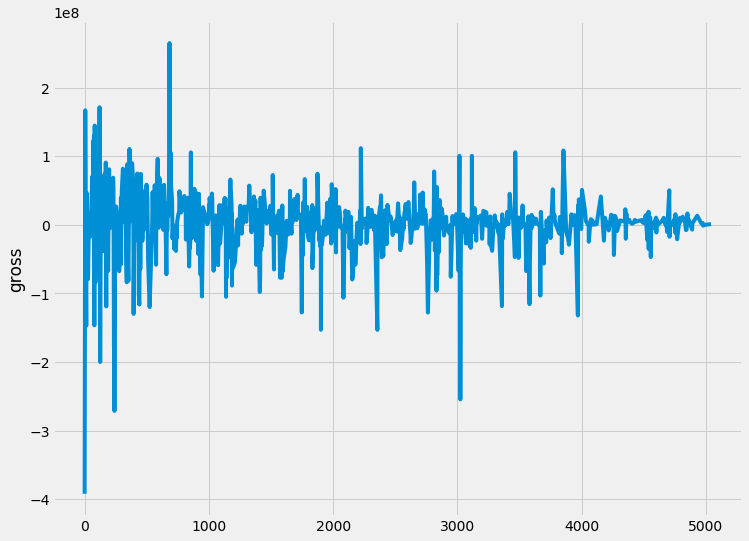

In [106]:
plt.figure(figsize = (11,8.5))
sns.lineplot(x = y_test.index, y = preds - y_test)